#<font face='menlo' size=12pt>Probability and Distributions </font>

In [11]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

## <font color='blue' size=6pt> Probability</font>

The main idea can be explained in simple terms:

If $A$ is some event then the probability of $A$ can be understood as its frequency of occurring. Thus we understand that the probability is always a number $p$ such that 

$$\large 0\leq p\leq 1$$

The probability of the event $A$ can be denoted by $$\large P(A)$$ and if we have finitely many outcomes  then $$\large P(A):=\frac{n(A)}{n(X)}$$ where $n(A)$ represents the number of favorable outcomes to $A$ and $n(X)$ represents the total number of outcomes. If we think of repeating an experiment finitely many times where $A$ is a possible outcome, then $P(A)$ can be approximated by the relative frequency of occurrence provided we repeated the experiment *sufficiently* many times.

In practice the study of continuous random variables and different probability distributions is extremely important.

### <font color='deepskyblue'> Examples</font>

In Python, we can use many different probability distributions. The following code is an application with the *uniform* distribution. 

**Important** To sample from a distribution means that we choose some **discrete points** with likelihood defined by the **distribution’s probability density function.** When we sample, the density of
these points will approximate the probability density function of the distribution; the larger the number of points, the better the approximation.

The following code displays a histogram and the fit for a uniform distribution:



In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
# import seaborn - this is good for plotting histograms and probability distribution functions
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats #helps with many distribution functions
import numpy as np

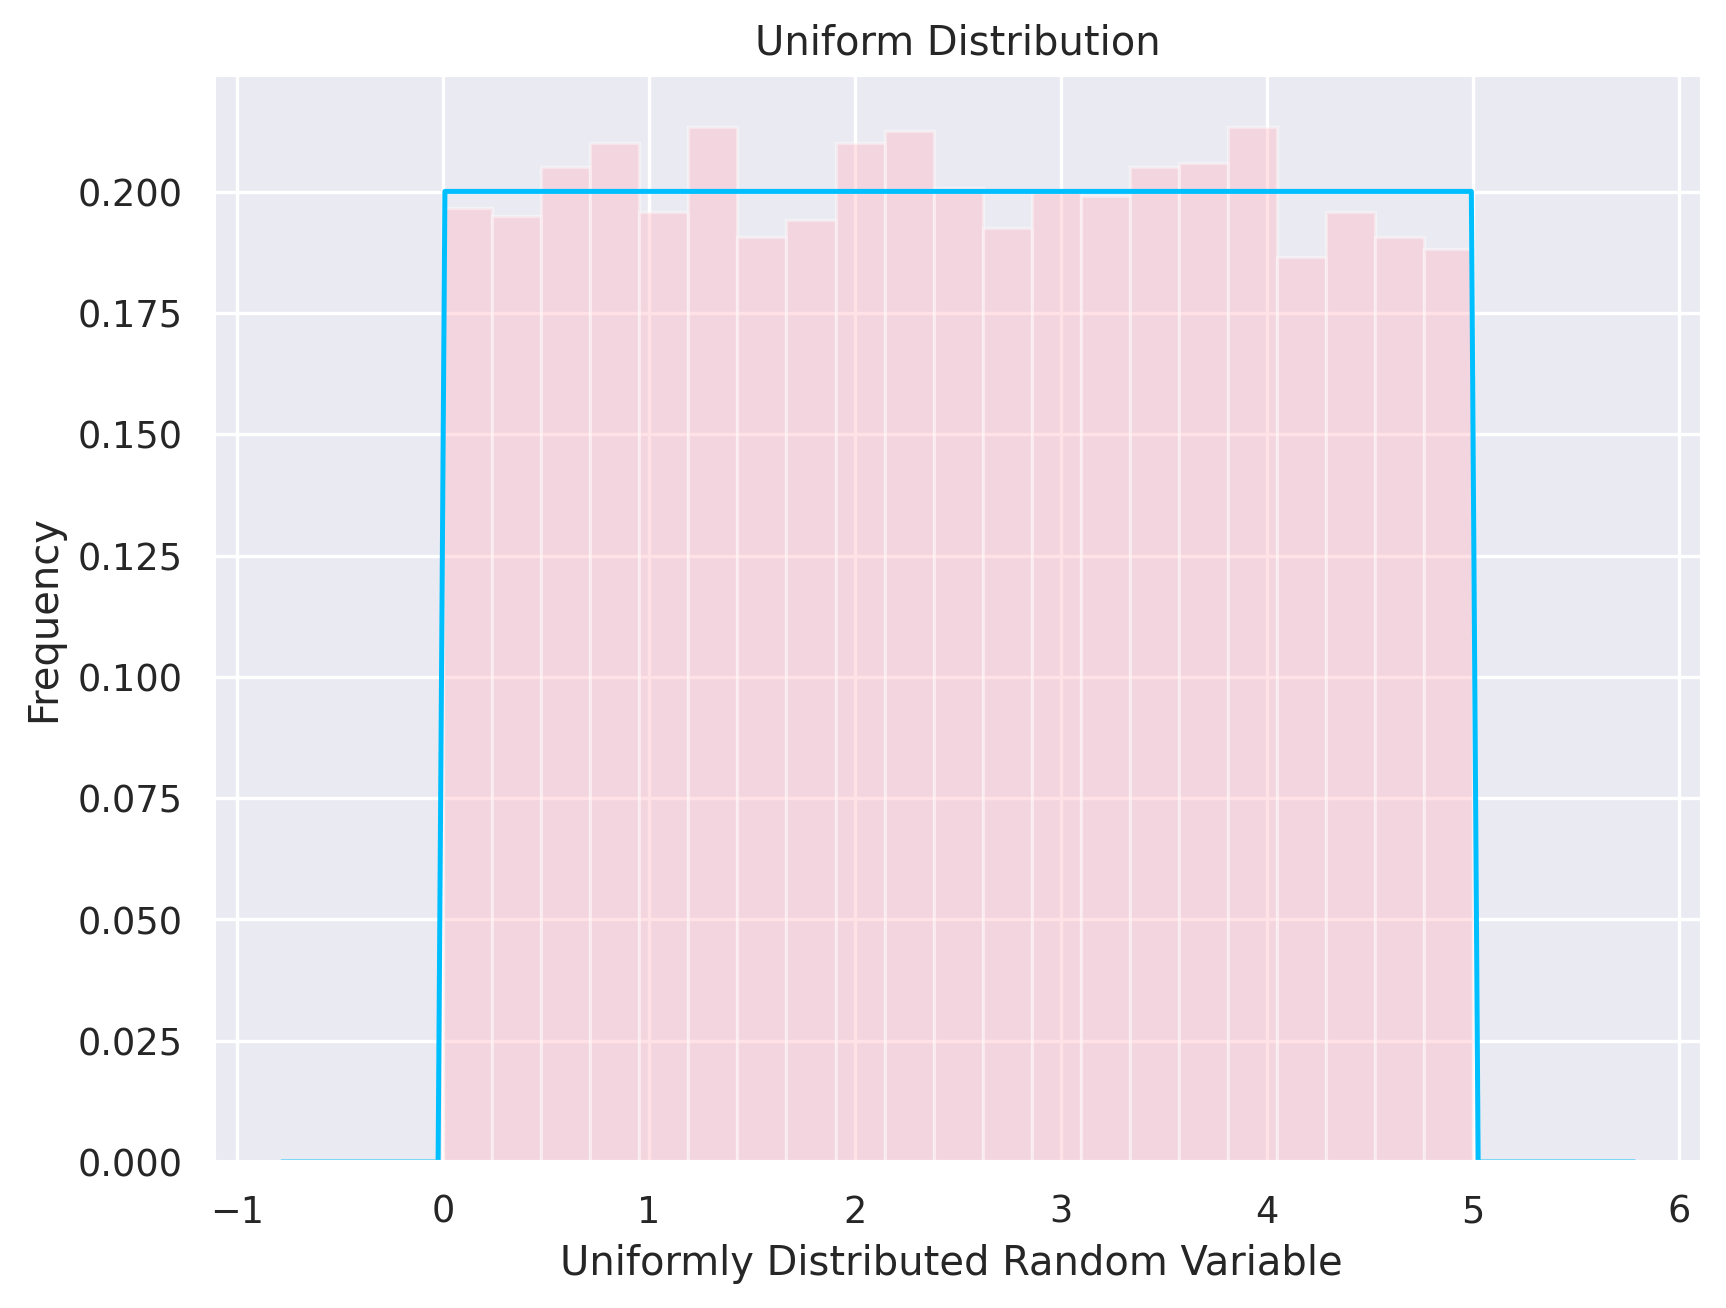

In [14]:
# import uniform distribution
from scipy.stats import uniform
# random numbers from uniform distribution
# Generate 5000 numbers from 0 to 5
# can change n to demonstrate law of large numbers
n = 5000 #trials
a = 0 # beginning of interval
b = 5 #upper bound
data_uniform = uniform.rvs(size=n, loc = a, scale=b) #sample
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(data_uniform,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.uniform,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Uniformly Distributed Random Variable ', ylabel='Frequency', title='Uniform Distribution')
plt.show()

In [5]:
n=10000
new_data = uniform.rvs(size=n, loc = 0, scale=5)

In [6]:
new_data.shape 

(10000,)

In [7]:
idx = ((new_data>1) & (new_data<3)) #returns a boolean for a values between 1 and three

In [8]:
count = sum((idx == True)) #find where true is returned

In [9]:
# the experimental probability that the random variaable is between 1 and 3 is:
count/n

0.3894

In [10]:
# the theoretical probability is 
(3-1)/5

0.4

## <font color='blue' size=6pt> Distributions</font>

For a continuous random variable $X$, the probability density function helps us compute the probability that X is in some given interval $[a,b]$:

$$\large P\left( a<X<b\right):=\int\limits_{a}^{b} f(x)dx$$

That is to say the area under the graph of the density function when $X$ is between $a$ and $b.$

### Exercise:

What is the function $f$ for a uniform distribution? How can we find the probability that $a<X<b$ given two values $a$ and $b$?

Let's have an example with the **uniform** distribution:

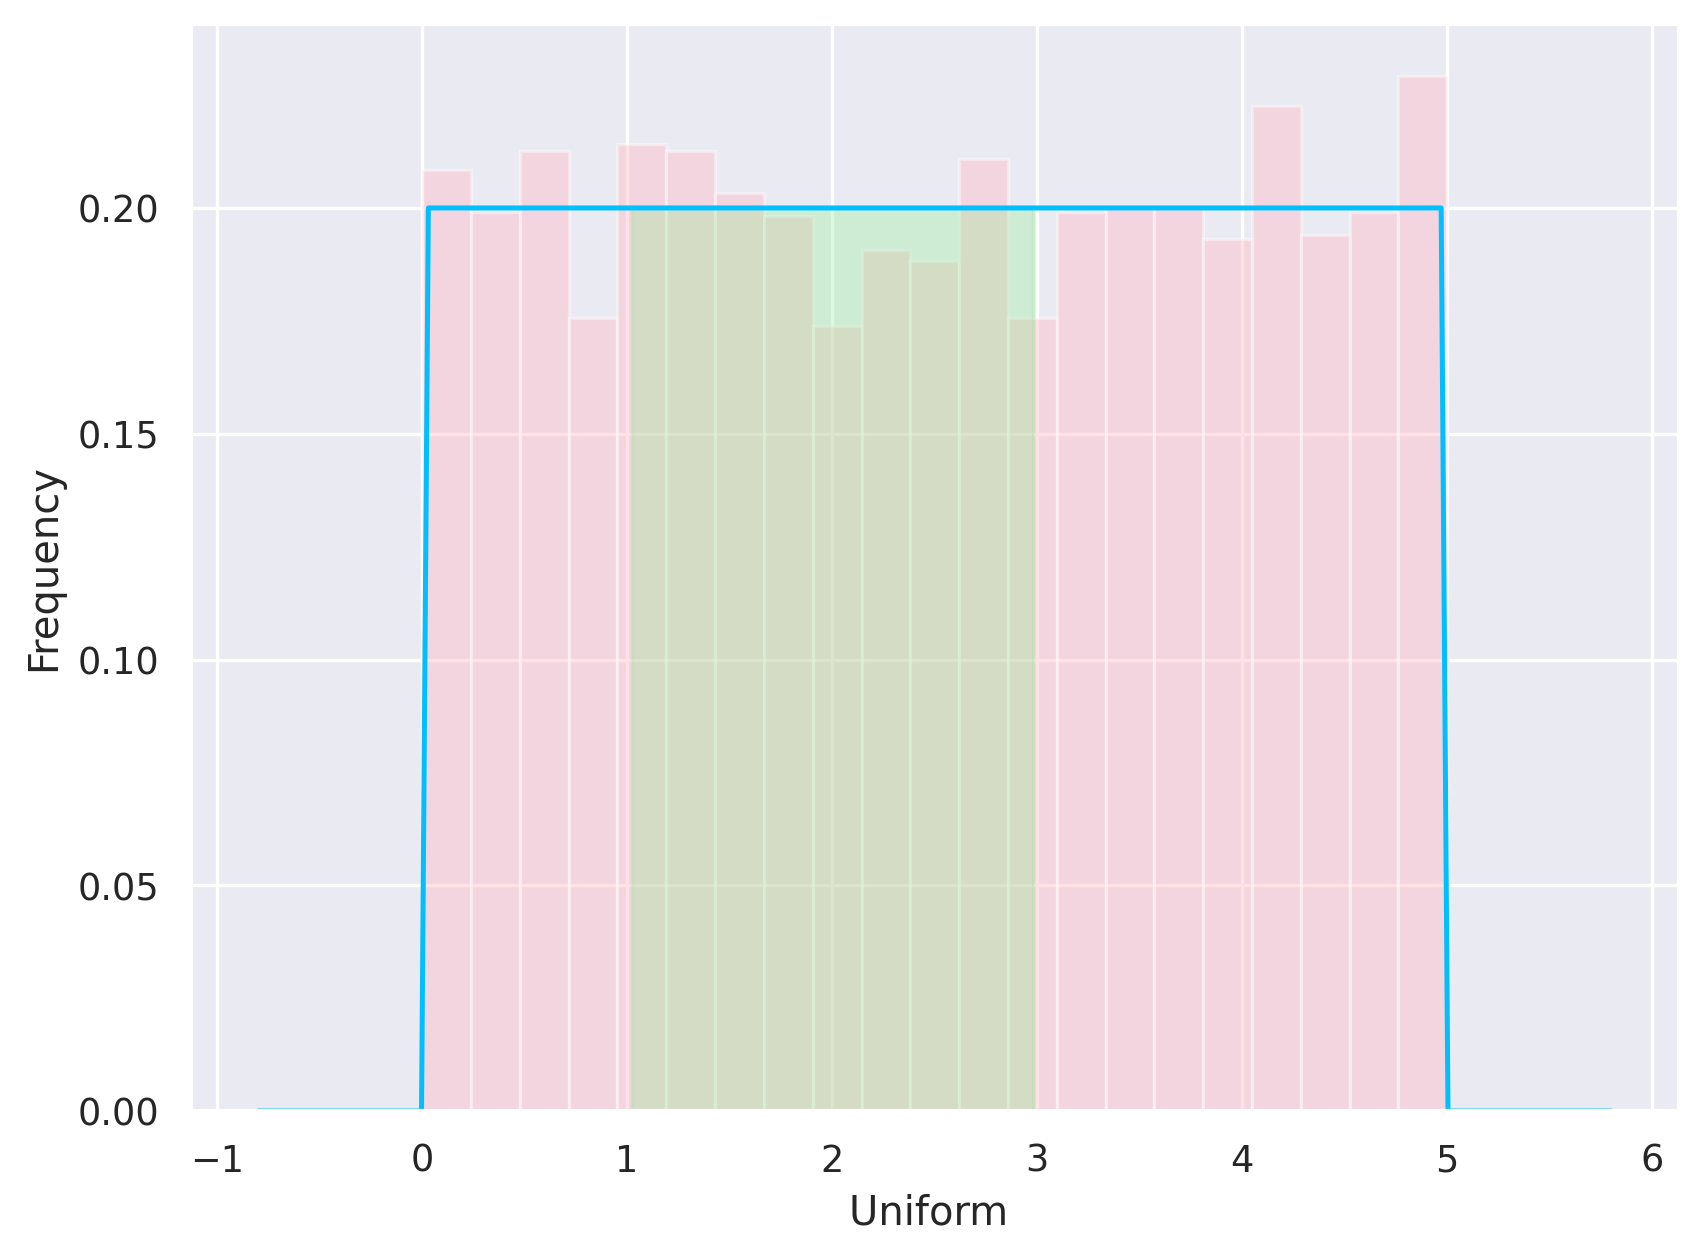

In [11]:
n = 5000
a = 0
b = 5
data_uniform = uniform.rvs(size=n, loc = a, scale=b)
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(data_uniform,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.uniform,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Uniform ', ylabel='Frequency')

# here we shade the area under the distribution curve between two values of the random variable
l = ax.lines[0]
x = l.get_xydata()[:,0]
y = l.get_xydata()[:,1]
ax.fill_between(x,y, where=(1<=x) & (x <= 3.0), color='lightgreen',alpha=0.3)
plt.show()

Now we compute 

$$\large P\left( a<X<b\right)$$ 

by using a Monte Carlo simulation (experimental probability)

In [12]:
n = 1000000
rv = uniform.rvs(size=n, loc = -1, scale=4)

In [13]:
count = ((rv>=0) & (rv<=1.5)) + 0

In [14]:
sum(count)/n

0.375355

In [15]:
15/40

0.375

----------------------------
### <font color='blue' size=6pt> The Normal Distribution</font>


Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science. You will encounter it at many places especially in topics of statistical inference. It is one of the assumptions of many data science algorithms too.

A normal distribution has a bell-shaped density curve described by its mean μ and standard deviation σ. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean μ and standard deviation σ at a given point x is given by:

$$\large f(x):=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

If the mean is 0 and the standard deviation is 1 then the probability density function is:

$$\large f(x):=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

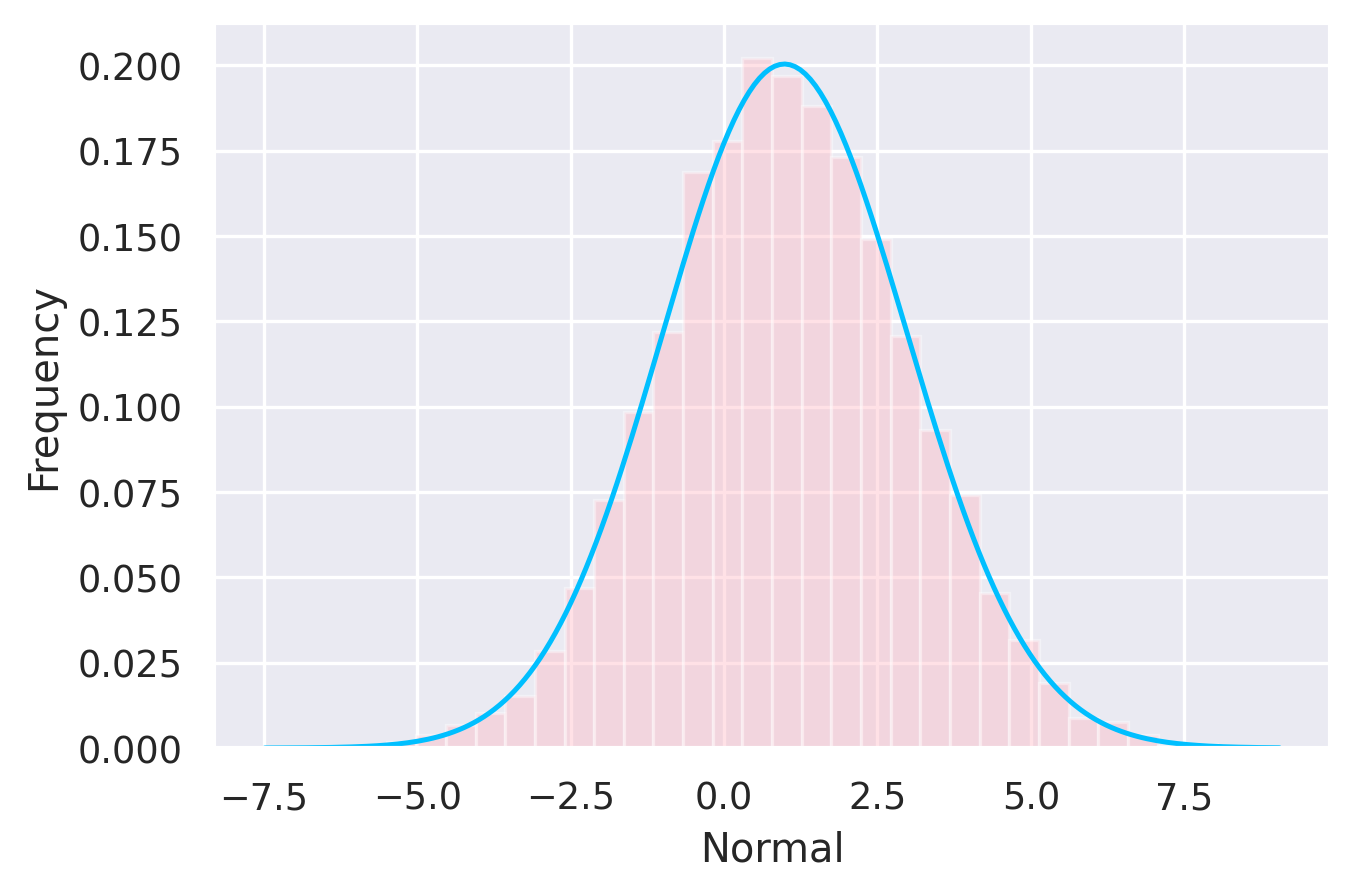

In [16]:
from scipy.stats import norm
# generate random numbersfrom N(0,1)
data_normal = norm.rvs(size=7000,loc=1,scale=2) #normal loc means mean and scale means standard dev
# then we want to display the histogram and the fit of the underlying distribution:
ax = sns.distplot(data_normal,
                  bins=30,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.gamma,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Normal', ylabel='Frequency')
plt.show()

**Execrcise:** Find the probability that the random number sampled falls between -2 and 0

In [17]:
n = 1000
x = norm.rvs(size= n,loc=1,scale=2)
count = ((x > -2) & (x < 0)) 
sum(count / n)

0.25000000000000017

###<font color='blue' size=6pt>  $\chi^2$ Distribution
The chi-square distribution is useful for modeling the distribution of the sample variance for normally distributed random variables.

Sample variance:

$$\large \frac{\sum\limits_{i=1}^{n}(X_i-\bar{X})^2}{n-1}$$

The sample is a collection of the values $X_1,X_2,X_3,...X_n$ and  $\bar{X}$ is the mean of the sample.

For $n$ degrees of freedom, the $\chi^2$ probability distribution function is:
$$\large f(x):=\begin{cases} \frac{1}{2^{\frac{n}{2}}\Gamma\left(\frac{n}{2}\right)} x^{\frac{n}{2}-1}e^{-\frac{x}{2}} &\text{if}& x\geq 0 \\
0 &\text{if}& x<0. \end{cases}$$

where $\large \Gamma(x)=\int\limits_{0}^{\infty}x^{n-1}\cdot e^{-x}dx$. For positive integers we have $\large Γ(n)=(n-1)!$

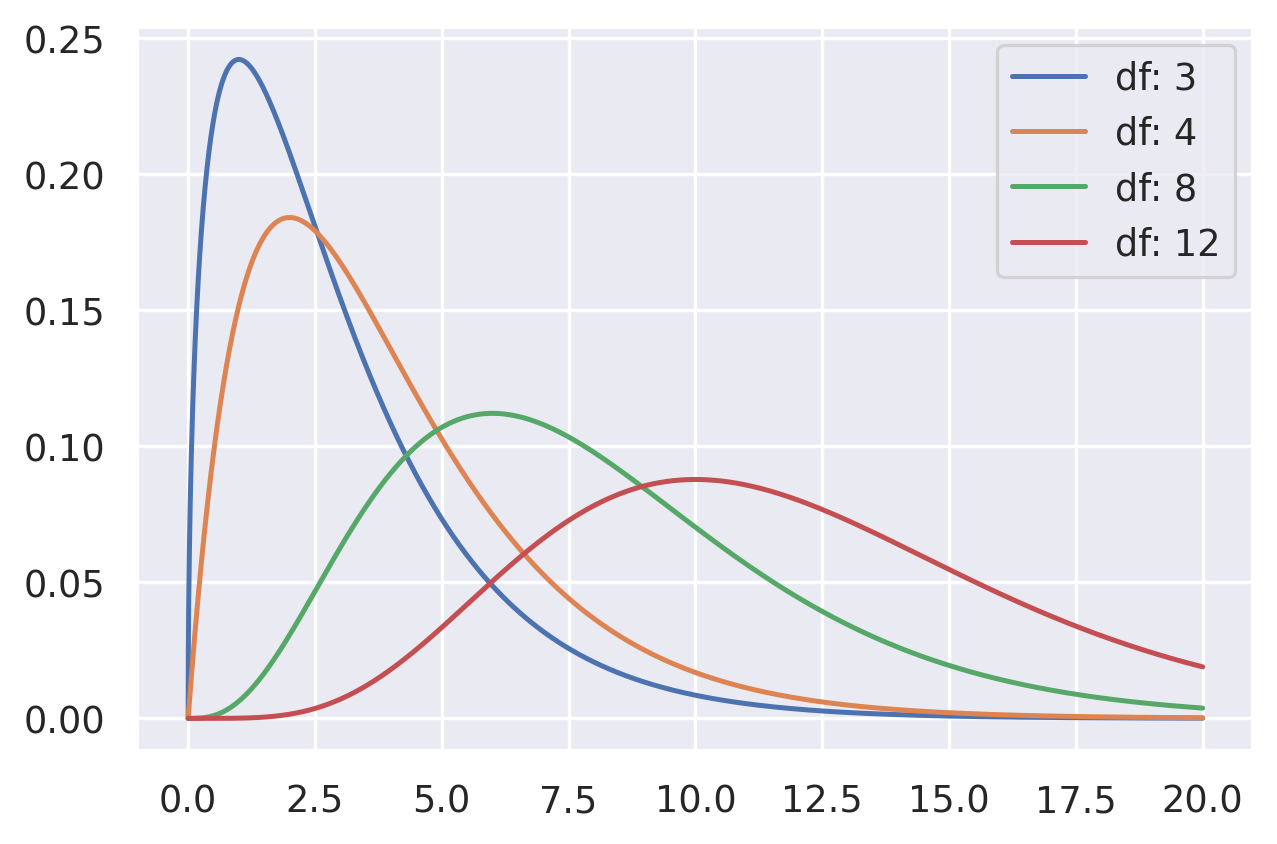

In [19]:
from scipy.stats import chi2
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=3), label='df: 3')
plt.plot(x, chi2.pdf(x, df=4), label='df: 4')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8') 
plt.plot(x, chi2.pdf(x, df=12), label='df: 12') 

#add legend to plot
plt.legend()
plt.show()

### <font color='blue' size=6pt> Gamma Distribution

The gamma distribution is a two-parameter family of continuous probability distributions. Exponential, chi-squared, erlang distributions are special cases of the gamma distribution. The gamma distribution can be parameterized in terms of a shape parameter α=k and an inverse scale parameter β=1/θ, called a rate parameter., the notation Γ(n) represents the gamma function and is defined as (n−1)! 

The probability distribution function is:

$$\large f(x,\alpha,\beta):=\frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1}e^{-\beta x}$$

where $x, \alpha , \beta>0$

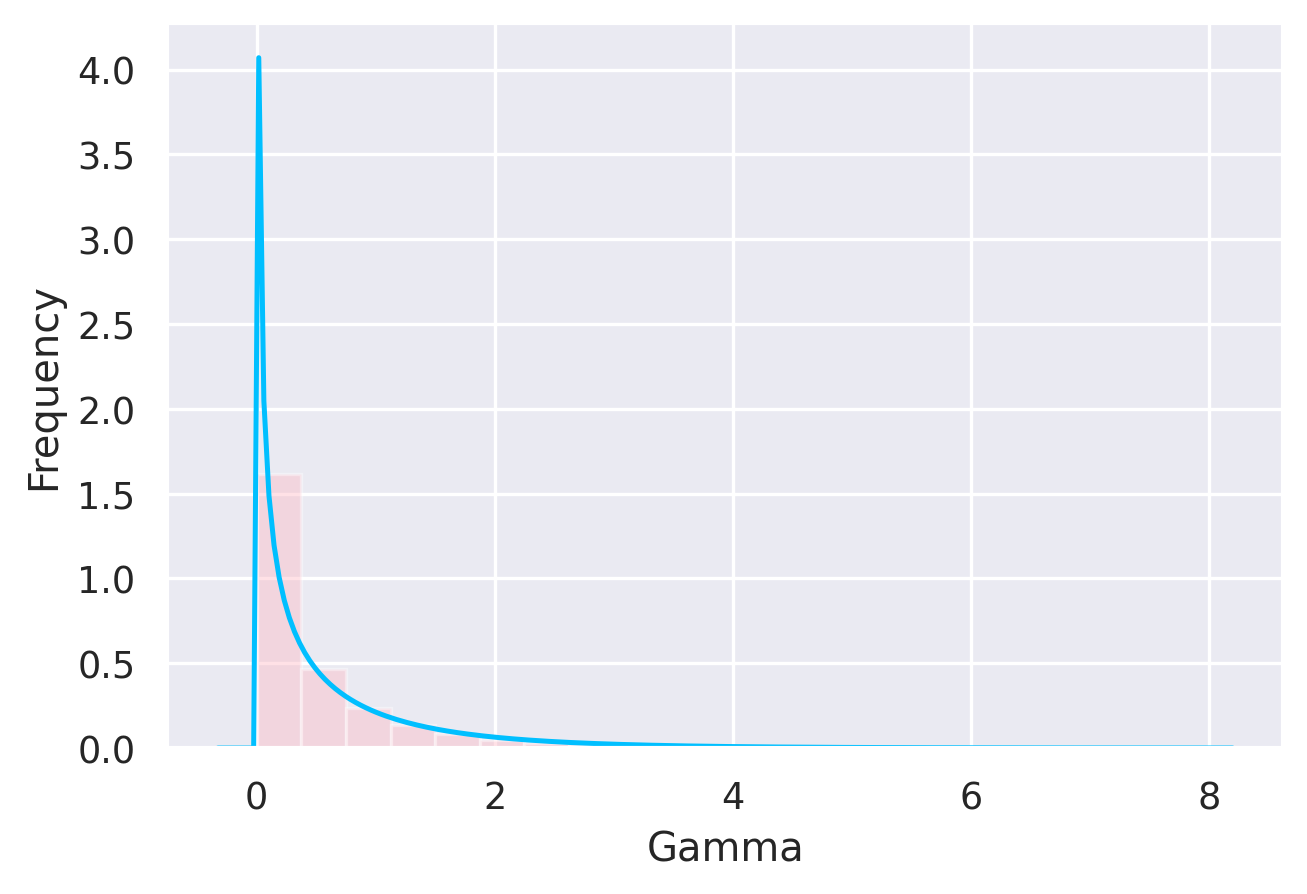

In [ ]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=.5,loc=0,scale=1, size=10000)
# then we want to display the histogram and the fit of the underlying distribution:
ax = sns.distplot(data_gamma,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.gamma,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Gamma', ylabel='Frequency')
plt.show()

###<font color='blue' size=6pt> Beta Distribution

The beta distribution is also a two-parameter family of continuous probability distributions with the following probability density function:
$$\large f(x,\alpha,\beta):= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}\cdot(1-x)^{\beta-1}$$

where $\Gamma$ is the Gamma function.

In [1]:
from scipy.stats import beta
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
from scipy.stats import norm
import numpy as np

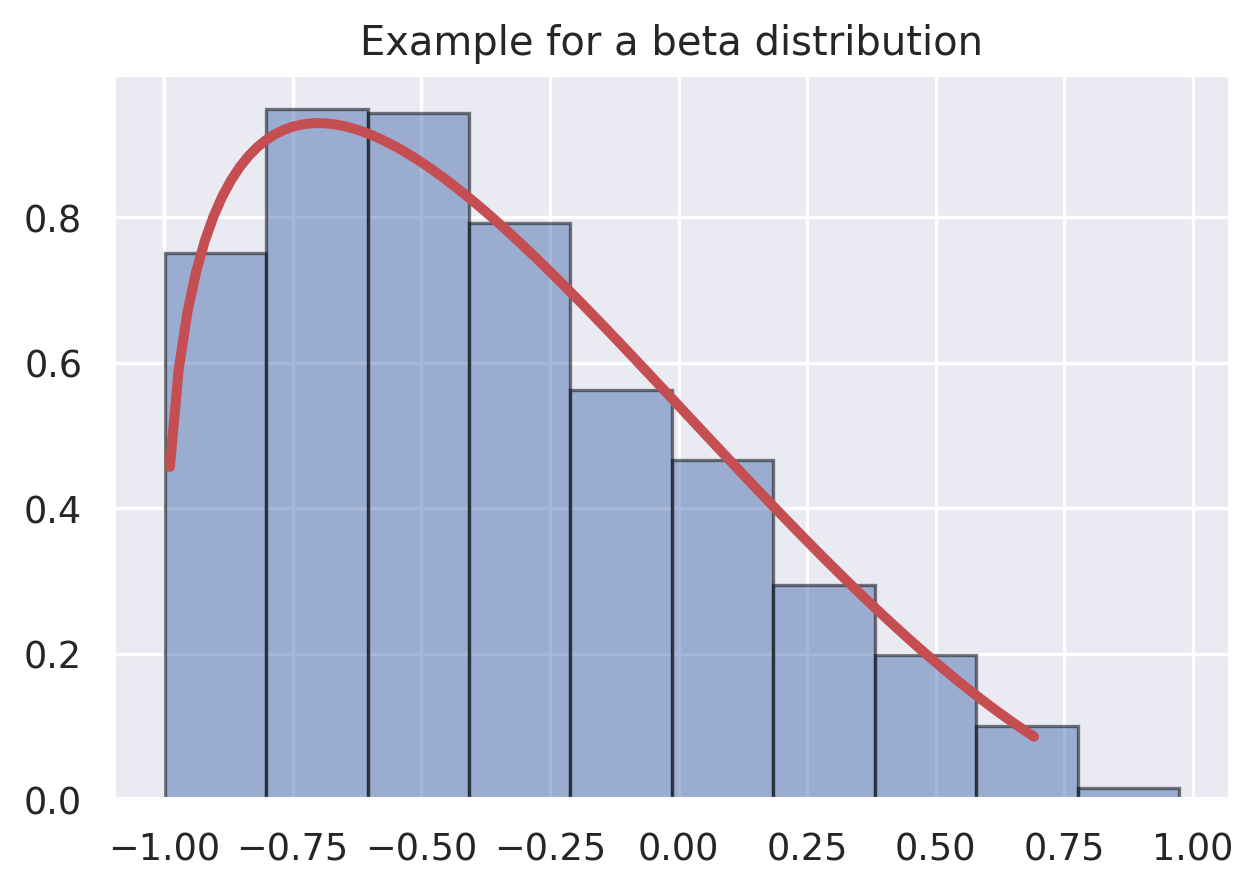

In [ ]:
a, b = 1.3, 2.7
loc = -1 #refers to where the distribution starts
scale = 2 #by how much you multiply the invterval from 0 to one so two means 0 to two but loc -1 makes it -1 to 1
mean, var, skew, kurt = beta.stats(a, b,loc = loc, scale = scale, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b,loc=loc),beta.ppf(0.99, a, b,loc = loc, scale = scale), 100)
r = beta.rvs(a, b,loc=loc,scale= scale, size=1000)
plt.hist(r, density=True, edgecolor='black',alpha=0.5)
plt.plot(x, beta.pdf(x, a, b,loc = loc, scale= scale), 'r-', lw=3)
# plt.legend(loc='best', frameon=False)
plt.title("Example for a beta distribution")
plt.show()

### <font color='blue' size=6pt> Exponential Distribution

The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. The distribution has a parameter λ called rate parameter, and its probability density function is:

$$\large f(x,\lambda):=\begin{cases} \lambda e^{-\lambda x} &\text{if}& x\geq 0 \\
0 &\text{if}& x<0. \end{cases}$$


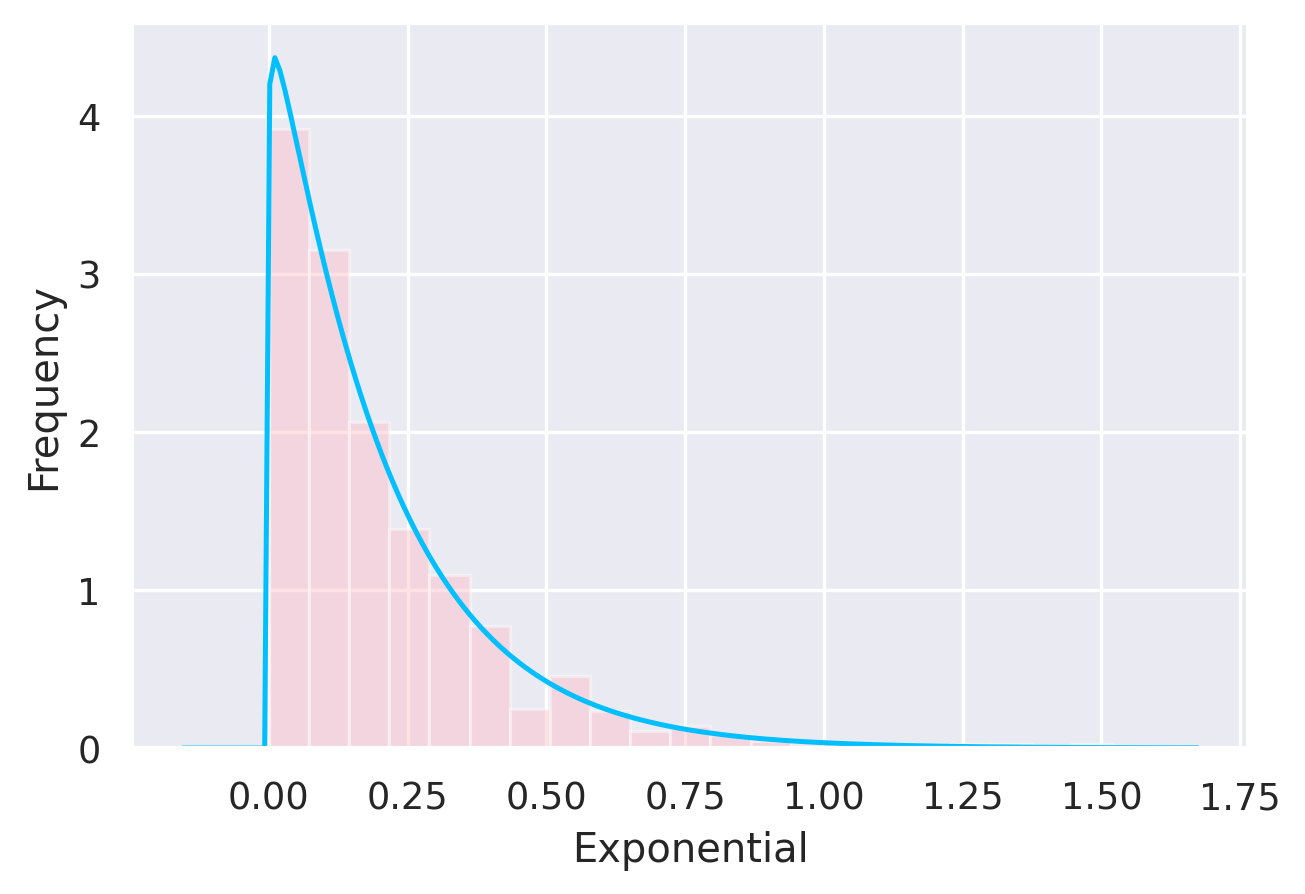

In [22]:
from scipy.stats import expon
data_expon = expon.rvs(scale=0.2,loc=0,size=1000)
# then we want to display the histogram and the fit of the underlying distribution:
ax = sns.distplot(data_expon,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.expon, #same as fit = stats.gamma
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Exponential', ylabel='Frequency')
plt.show()

### <font color='blue' size=6pt> Poisson Distribution

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate (μ) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated λ (lambda). Lambda is the event rate, also called the rate parameter. The probability of observing k events in an interval is modeled by the equation:

$$\large P(k \text{ events in an interval}):=e^{-\lambda}\frac{\lambda^k}{k!}$$

where $\lambda$ represents the average number of events in that interval.



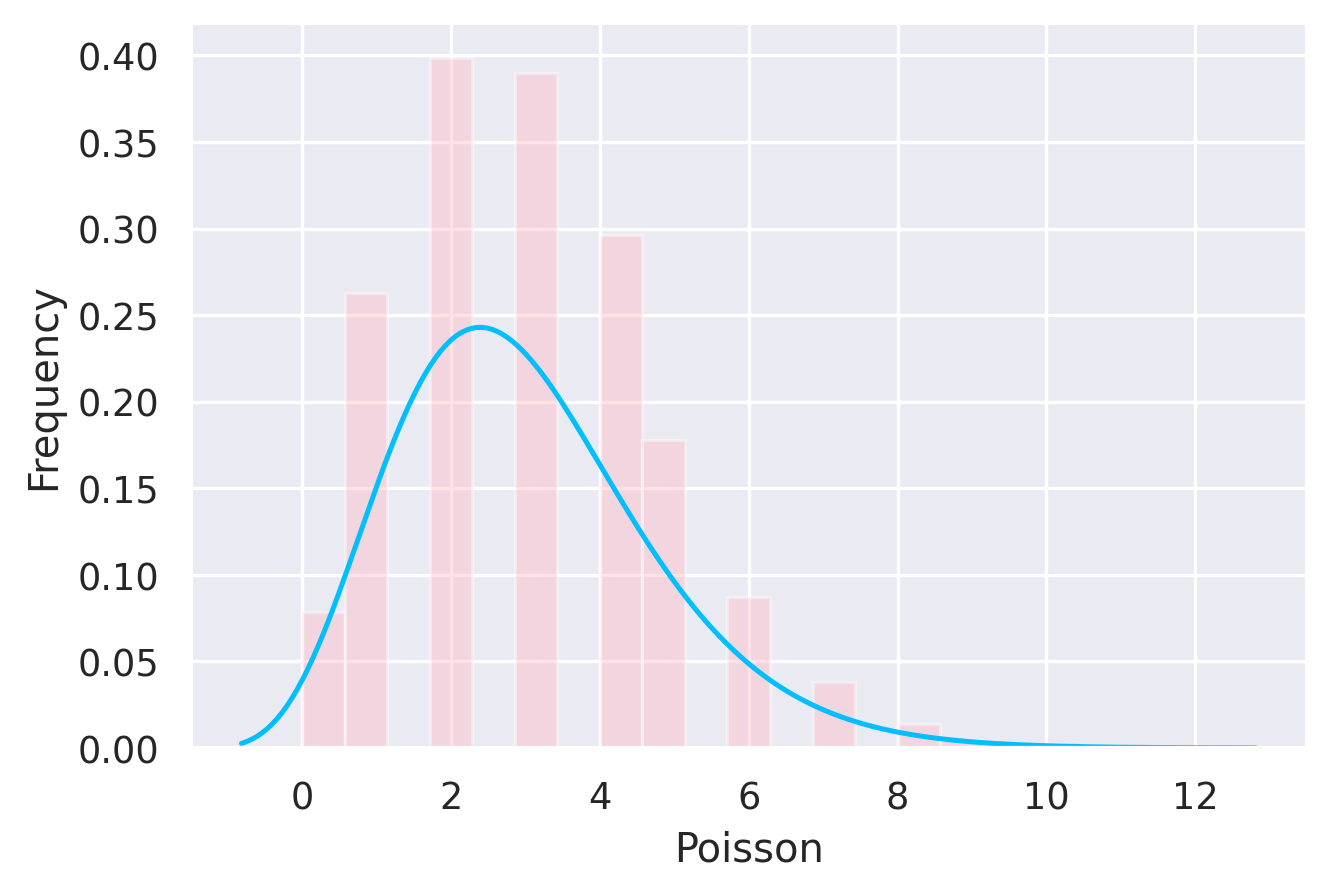

In [24]:
from scipy.stats import poisson #poisson works on time events
data_poisson = poisson.rvs(mu=3, size=10000)
# then we want to display the histogram and the fit of the underlying distribution:
ax = sns.distplot(data_poisson,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.gamma, #fit on best value of a parameter the controls the distribution function, gamma is a generalization of poisson
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Poisson', ylabel='Frequency')
plt.show()

## <font face='menlo' size=10pt>The Central Limit Theorem

In many situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a bell curve) even if the original variables themselves are not normally distributed.

Here $n$ refers to the sample size and $X_1, X_2, X_3...X_n$ are independently sampled values from the same distribution with mean $\mu$ and standard deviation $\sigma$. Then the sample mean $\bar{X}$ is almost following a normal distribution if $n$ is big enough. That normal distribution has mean $\mu$ and stabndard deviation $\frac{\sigma}{\sqrt{n}}$

Now we want to show a verification of CLT in Python:



In [25]:
from scipy.stats import beta
from scipy.stats import norm

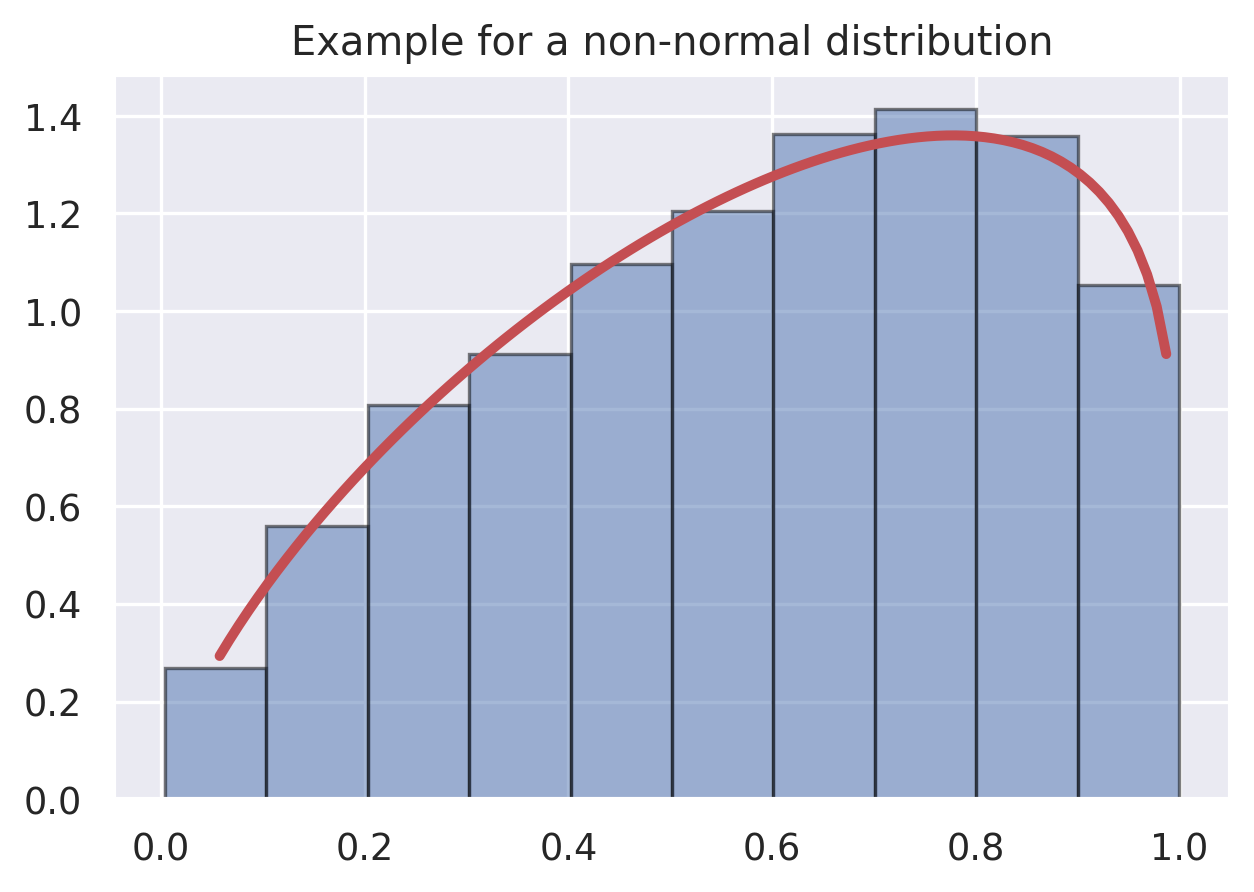

In [27]:
a, b = 1.7, 1.2
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
r = beta.rvs(a, b, size=10000) #random sample of a beta
plt.hist(r, density=1, edgecolor='black',alpha=0.5)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=3)
# plt.legend(loc='best', frameon=False)
plt.title("Example for a non-normal distribution")
plt.show()

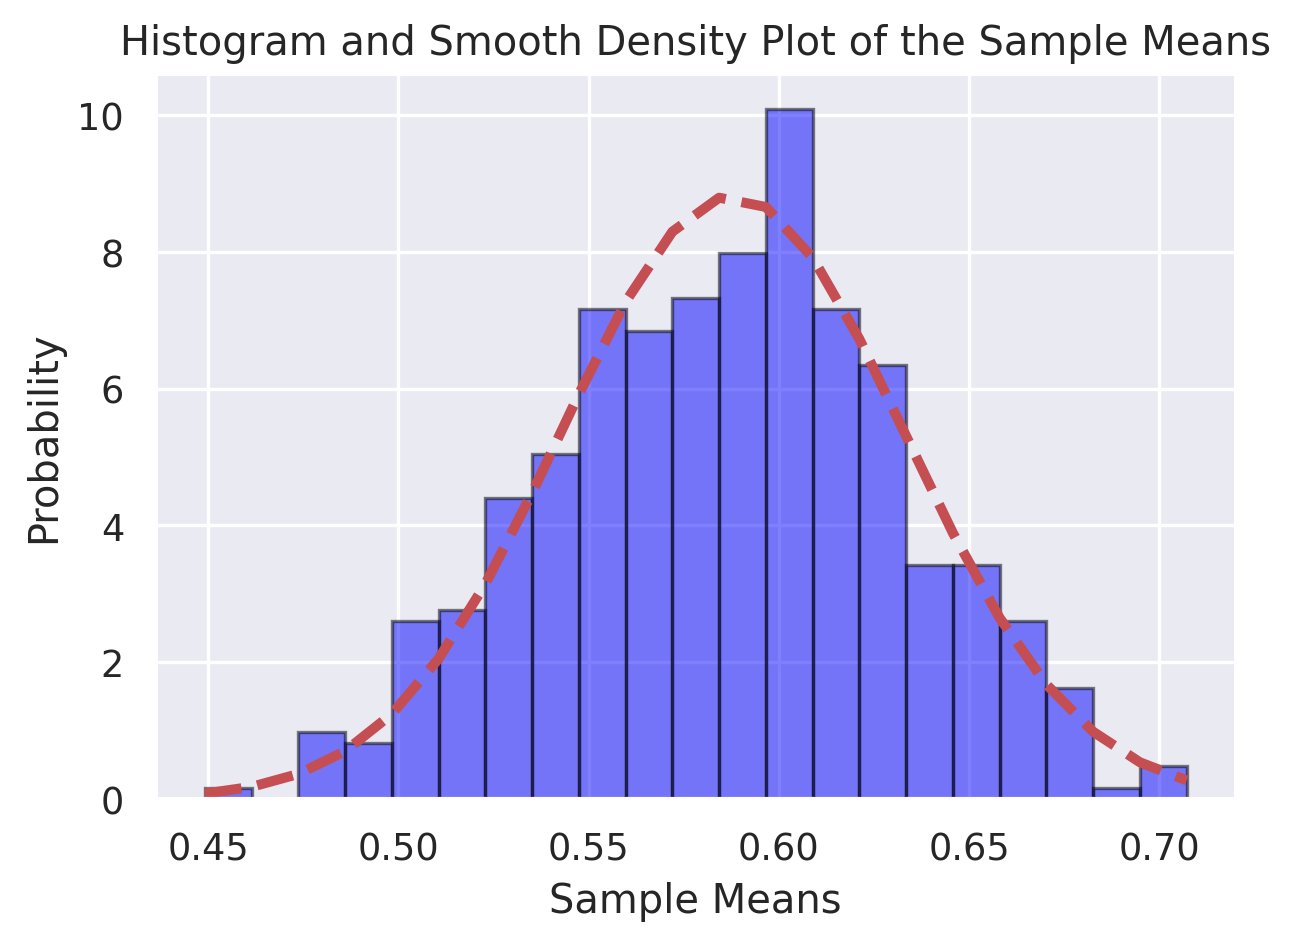

In [30]:
n = 30 # we compute many random samples of size 30
means = [np.mean(np.random.choice(r,n,replace=True,p=None)) for _i in range(500)]
#helps get a subset of r from size n, sample with replacement, and p is probability unchanged 
mu = np.mean(r)
sigma = np.std(r)/np.sqrt(n)
num_bins = 21
n, bins, patches = plt.hist(means, num_bins, density=1, edgecolor='black',facecolor='blue', alpha=0.5)
# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--',lw=3)
plt.xlabel('Sample Means')
plt.ylabel('Probability')
plt.title(r'Histogram and Smooth Density Plot of the Sample Means')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

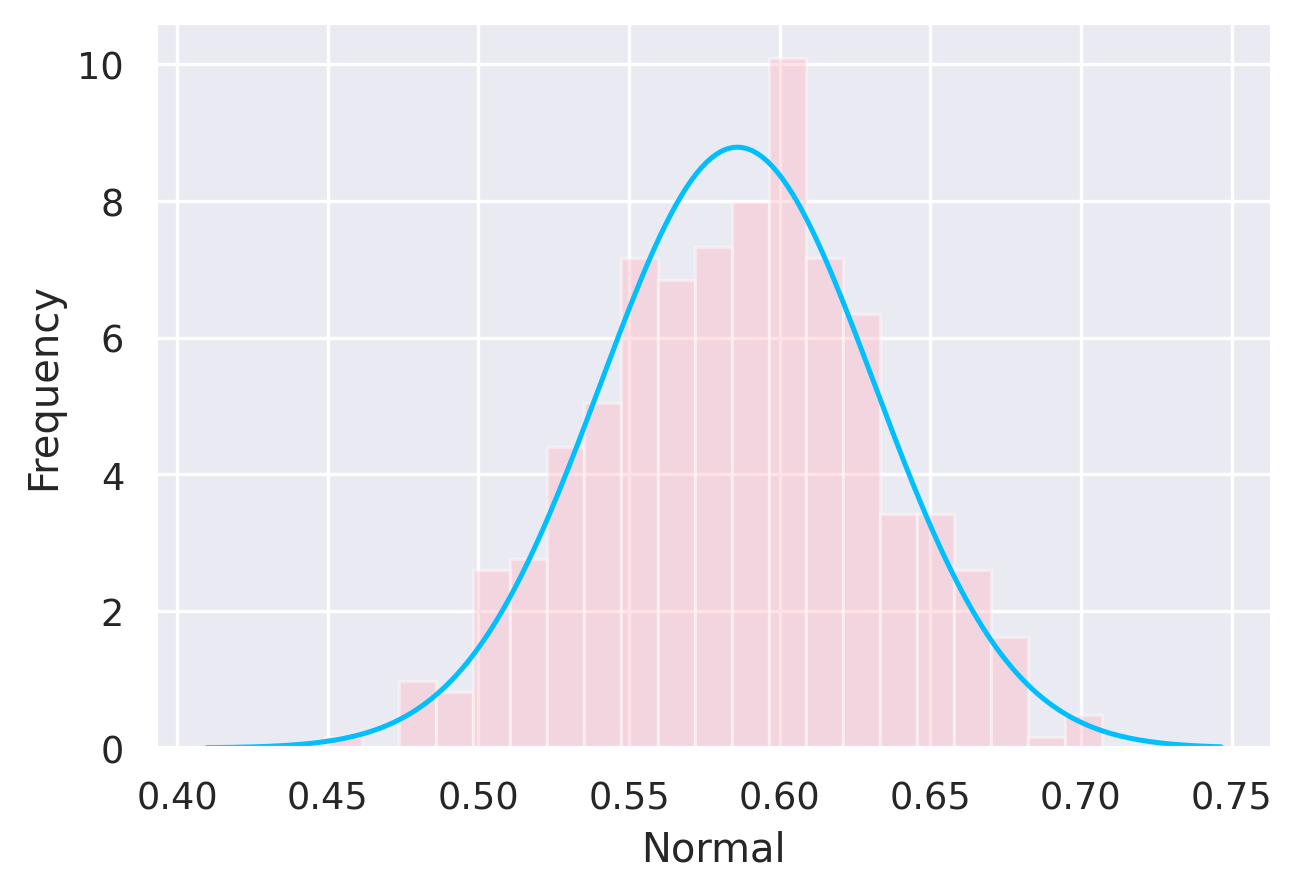

In [35]:
#same graph as above, but using seaborn
ax = sns.distplot(means,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Normal', ylabel='Frequency')
plt.show()

## When it CLT does not work

The concept of degrees of freedom is important here. In practice, most of the real data situations satisfy the requirement for $$df>2$$ so you do not have to worry about that the Central Limit Theorem may not work.

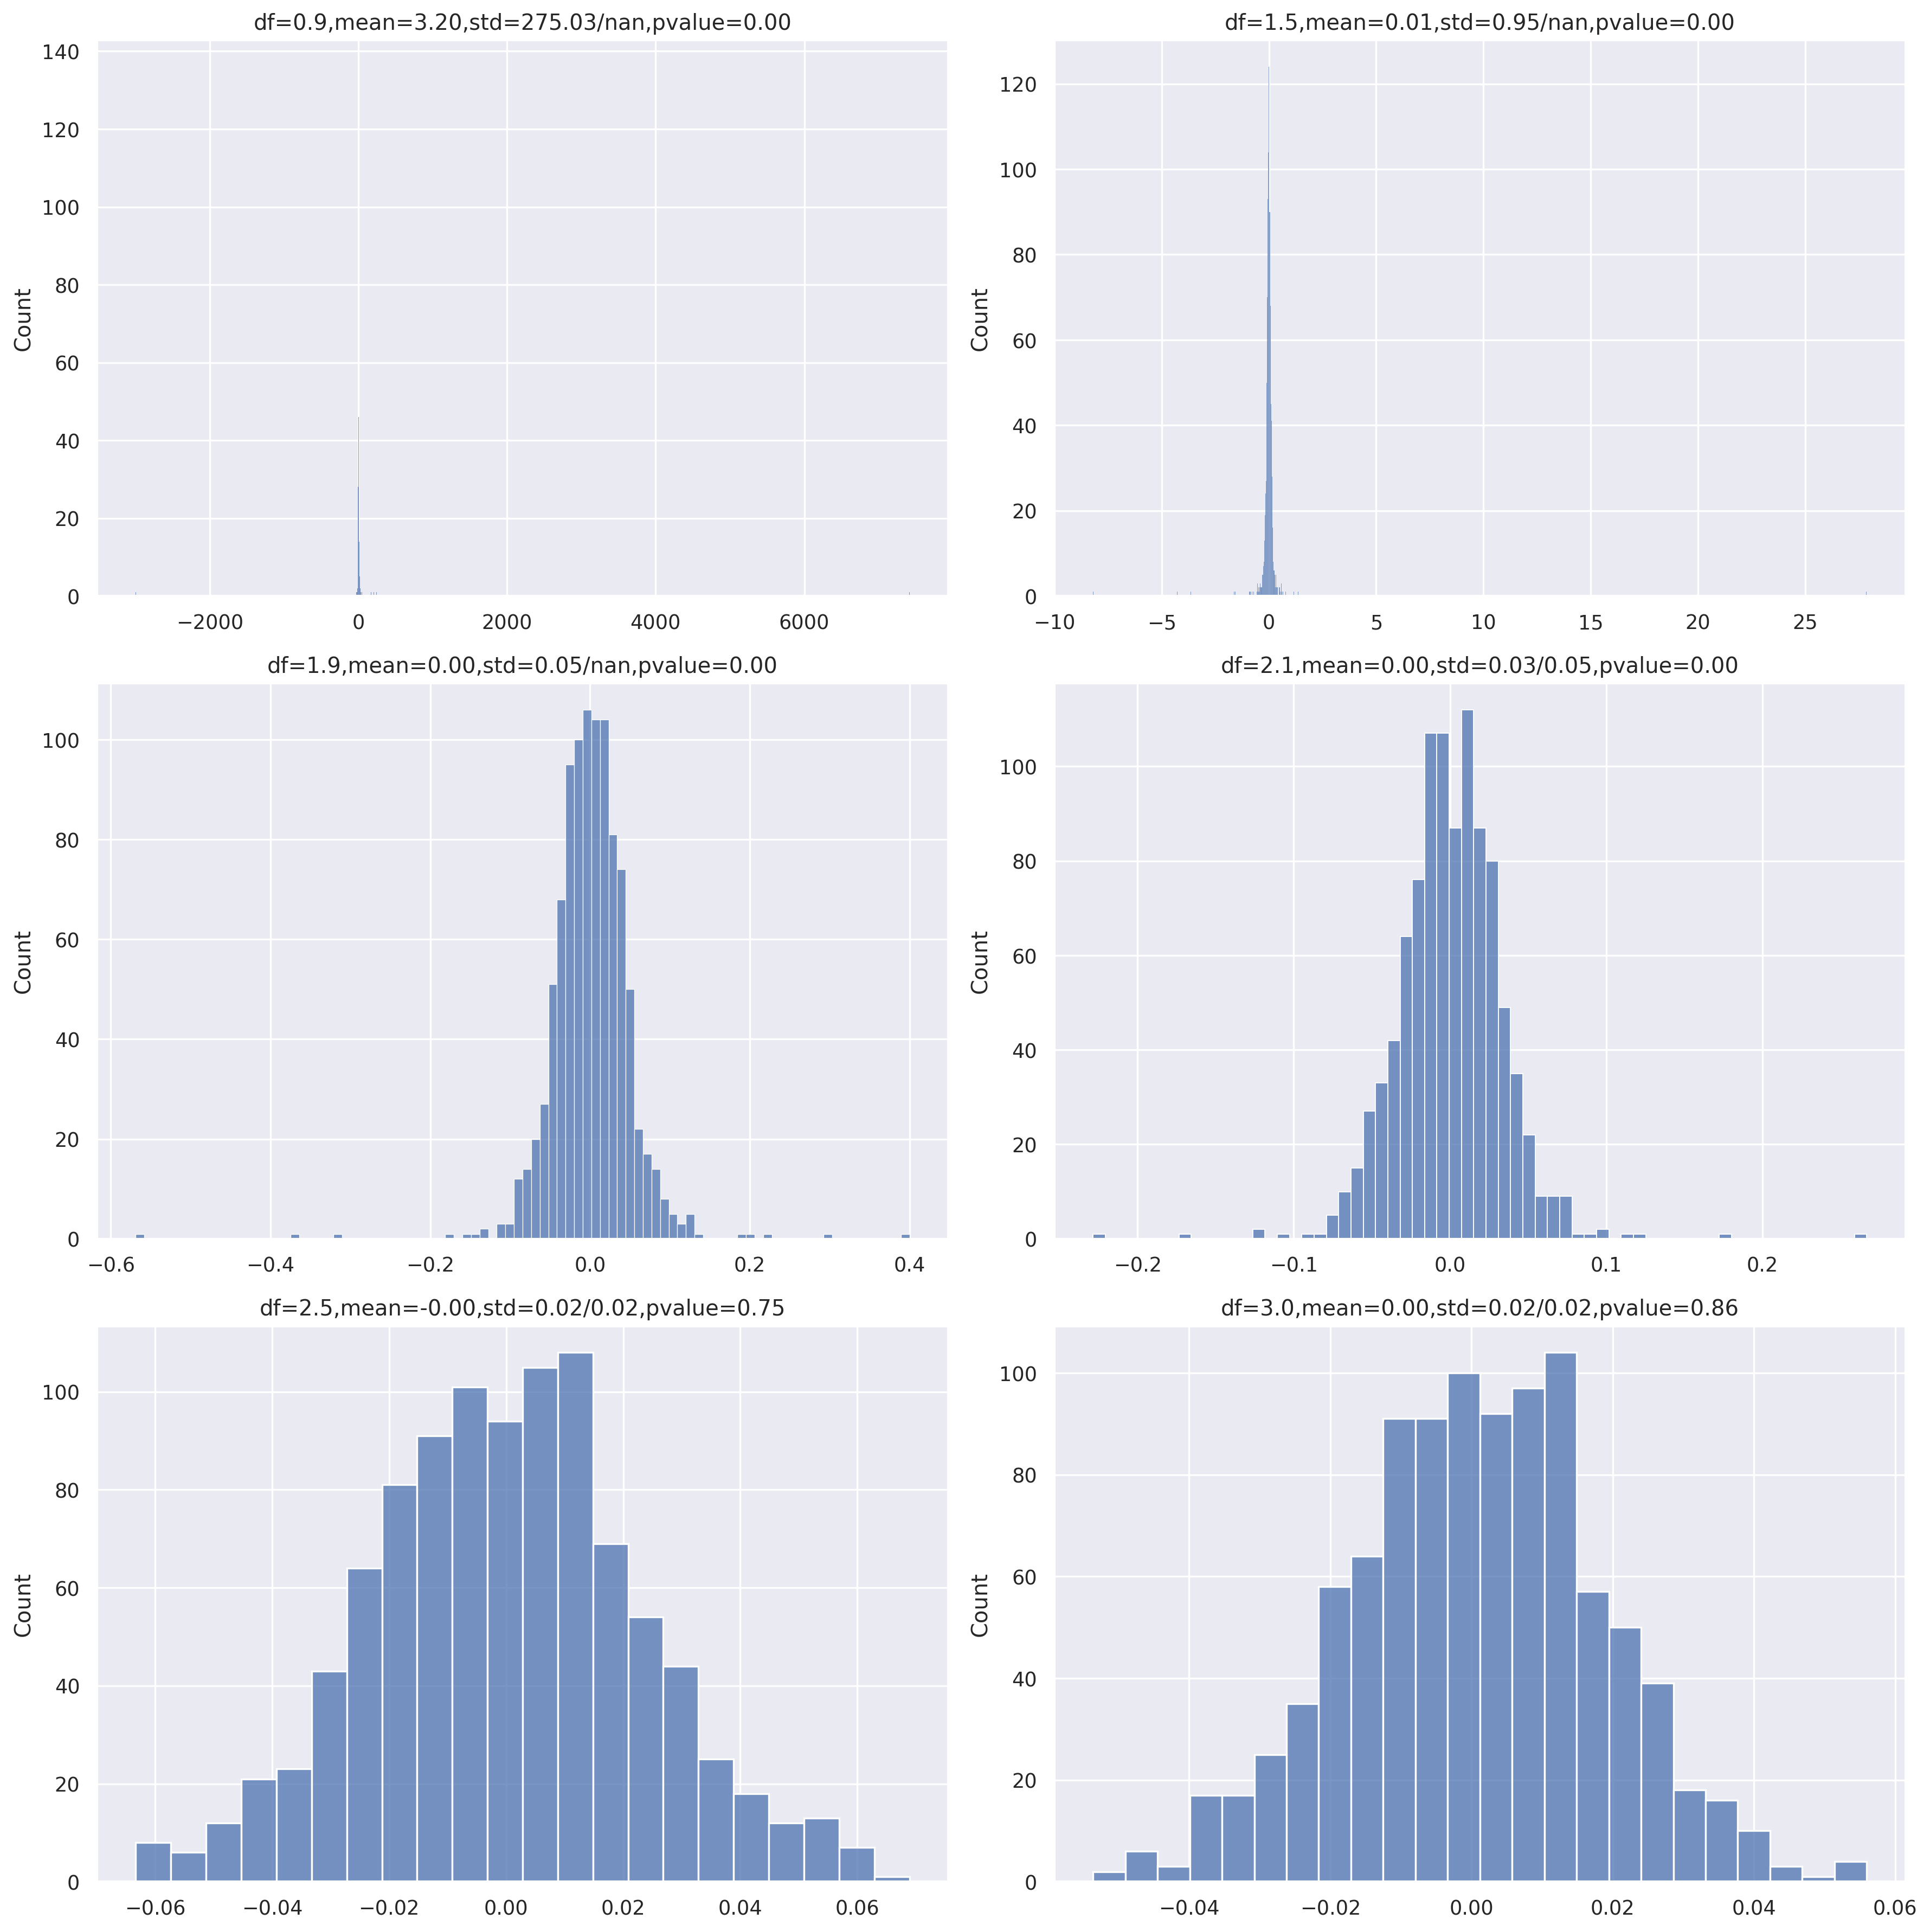

In [36]:
#df>2 means you need to maintain independence
import seaborn as sns
from scipy import stats

n=1000
n_samples=10000
_,axs=plt.subplots(3,2,figsize=(15,15))
for i,df in enumerate((0.9,1.5,1.9,2.1,2.5,3.0)):
    ax=axs[i//2,i%2]
    data=np.random.standard_t(df=df,size=(n,n_samples)).mean(1)
    mean=0 if df>1 else np.nan
    std=np.sqrt(df/(df-2)/n_samples) if df>2 else np.nan
    sns.histplot(data,ax=ax)
    r=stats.normaltest(data)
    ax.set_title('df={df},mean={sample_mean:.2f},std={sample_std:.2f}/{std:.2f},pvalue={pvalue:.2f}'.format(df=df,std=std,pvalue=r.pvalue,sample_mean=data.mean(),sample_std=data.std()))
plt.tight_layout()

## <font color='blue' size=6pt> <font color='Blue'>The Bayesian Theorem</font>

Let A and B represent two different events:

$$\Large{P\left (A\,|\,B\right )=\frac{P(B\,|\,A)P(A)}{P(B)}}$$

Where $P(A|B)$ means the probability of event $A$ provided event $B$ holds.

The main idea comes from the conditional probability rule:

$$\Large{P(A\cap B) = P(A)\cdot P(B\,|\,A) = P(B)\cdot P(A\,|\,B)}$$

The intuition could be presented in a visual way:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1O2Hg3q1RwxmxDuoi5pqG4W8Xnqb7zA1C'
width='500px' />
<figcaption>Example of conditional events by using a Venn Diagram</figcaption></center>
</figure>

where $\large{P(A)=\displaystyle\frac{Area(A)}{Area(S)}}$, $\large{P(B)=\displaystyle\frac{Area(B)}{Area(S)}}$ and $\large{P(A\cap B)=\displaystyle\frac{Area(A\cap B)}{Area(S)}}.$


<font color='lightsalmon'>**Critical thinking question**: What is $P(A\,|\,B)$? 
</font>

$P(B\,|\,A)=\displaystyle\frac{Area(A\cap B)}{Area(A)}$


### <font color='magenta'>Bayesian Inference </font>

$$\Large{P(H\,|\,\text{data})}=\frac{P(\text{data}\,|\,H )\cdot P(H)}{P(\text{data})}$$

<font color='green'>**Terminology**</font>


- <font color='deepskyblue'>*Posterior*</font>: How probable is our hypothesis given the data observations (the specific evidence we collected)?


- <font color='deepskyblue'>*Likelihood*</font>: It represents how probable is the evidence given that our hypothesis is true.

- <font color='deepskyblue'>*Prior*</font>: How probable or frequent is our hypothesis in general?

- <font color='deepskyblue'>*Marginal*</font>: How probable is the new evidence under all possible hypotheses?

- In order to make a classification we want to know the *posterior distribution*.

- In the classification algorithm we maximize the likelihood.

- The *prior* distribution is assumed known.

- The probability of the data is assumed constant.

### <font color='skyblue'> Example: </font>

- Assume that $18\%$ of the population has a disease and label this event by $A$.
- Assume that $20\%$ of the population has the symptom (label the event of someone having the symptom by $B$) and that of those who have the disease, about $35\%$ have the symptom.

What is the probability that someone who has the symptom actually has the disease?

$$\Large{P\left (A\,|\,B\right )=\frac{P(B\,|\,A)P(A)}{P(B)}=\frac{0.35\cdot 0.18}{0.20}=0.315}$$


## <font color='blue' size=6pt> Problem Solving with Monte Carlo Simulations</font>

The main goal is to solve problems of data science by approximating probability values via carefully designed simulations. 

<font color='lightsalmon'>**Critical Thinking**</font>: we want to be problem solvers and we can address many practical questions by using repeated sampling from known distributions along with carefully qualified mathematical considerations.

### <font color='purple'> Flipping a Coin (with Python coding): </font> 

Flipping a coin and experimentally determining the probability of heads or tails.


In [ ]:
import random

In [ ]:
def coin_flip():
  return random.randint(0,1)

In [ ]:
for i in range(100):
  print(random.randint(0,7))

In [ ]:
[coin_flip() for _i in range(100)]

0.538

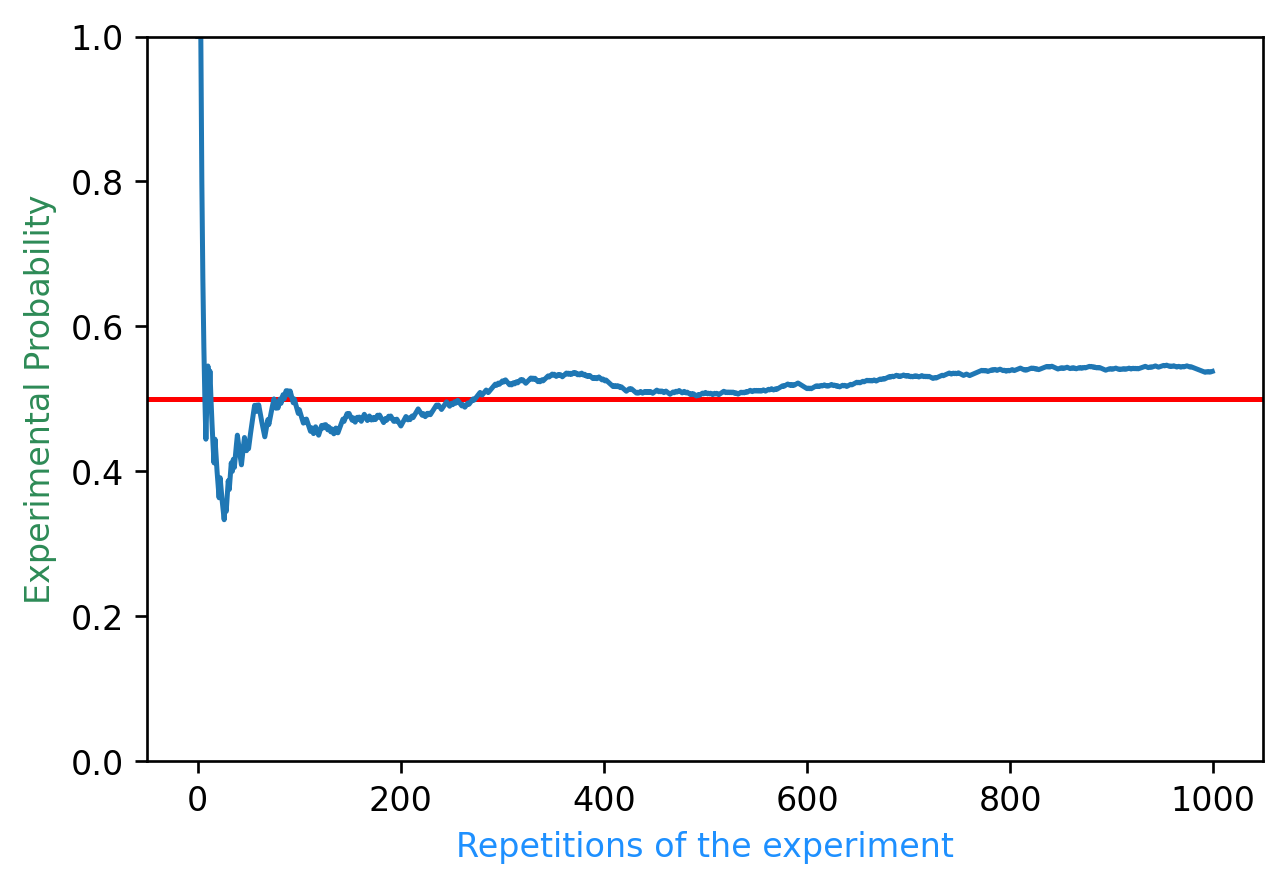

In [ ]:

 
# create an empty list to store all probability values
listp = []
 
# create the Monte Carlo simulation function
def monte_carlo(n):
  results = 0;
  for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result
 
    #compute probability
    prob_val = results/(i+1)
 
    # update the list of probability values
    listp.append(prob_val)
 
  return results/n
 
answer = monte_carlo(1000)
 
# plot the results
 
plt.axhline(y=0.5, color = 'red')
plt.plot(listp)
plt.ylim([0,1])
plt.xlabel("Repetitions of the experiment",color='dodgerblue')
plt.ylabel("Experimental Probability",color='seagreen')

answer

### <font color='purple'> The Monty Hall Problem


### Suppose you are on a game show, and you have the choice of picking one of three doors: Behind one door is a car; behind the other doors, goats. You pick a door, let’s say door 1, and the host, who knows what’s behind the doors, opens another door, say door 3, which has a goat. The host then asks you: do you want to stick with your choice or choose another door?

The good news is that the space of all possible outcomes is certainly finite and can be easily summarized:

<font color='darkblue'>

You Pick |	Prize Door |	Don’t Switch |	Switch
---:|---:|---:|---:
1|1|Win|Lose
1|2|Lose|Win
1|3|Lose|Win
2|1|Lose|Win
2|2|Win|Lose
2|3|Lose|Win
3|1|Lose|Win
3|2|Lose|Win
3|3|Win|Lose
  |  | 3 Wins (33%) | 6 Wins (66%) </font>

In [3]:
import random
doors = ["goat","goat","car"]

In [4]:
for i in range(10):
  random.shuffle(doors)
  print(doors)

['car', 'goat', 'goat']
['car', 'goat', 'goat']
['goat', 'goat', 'car']
['goat', 'goat', 'car']
['goat', 'goat', 'car']
['car', 'goat', 'goat']
['goat', 'car', 'goat']
['car', 'goat', 'goat']
['goat', 'car', 'goat']
['goat', 'goat', 'car']


Winning probability if you always switch: 0.6756666666666666
Winning probability if you always stick to your original choice: 0.3243333333333333


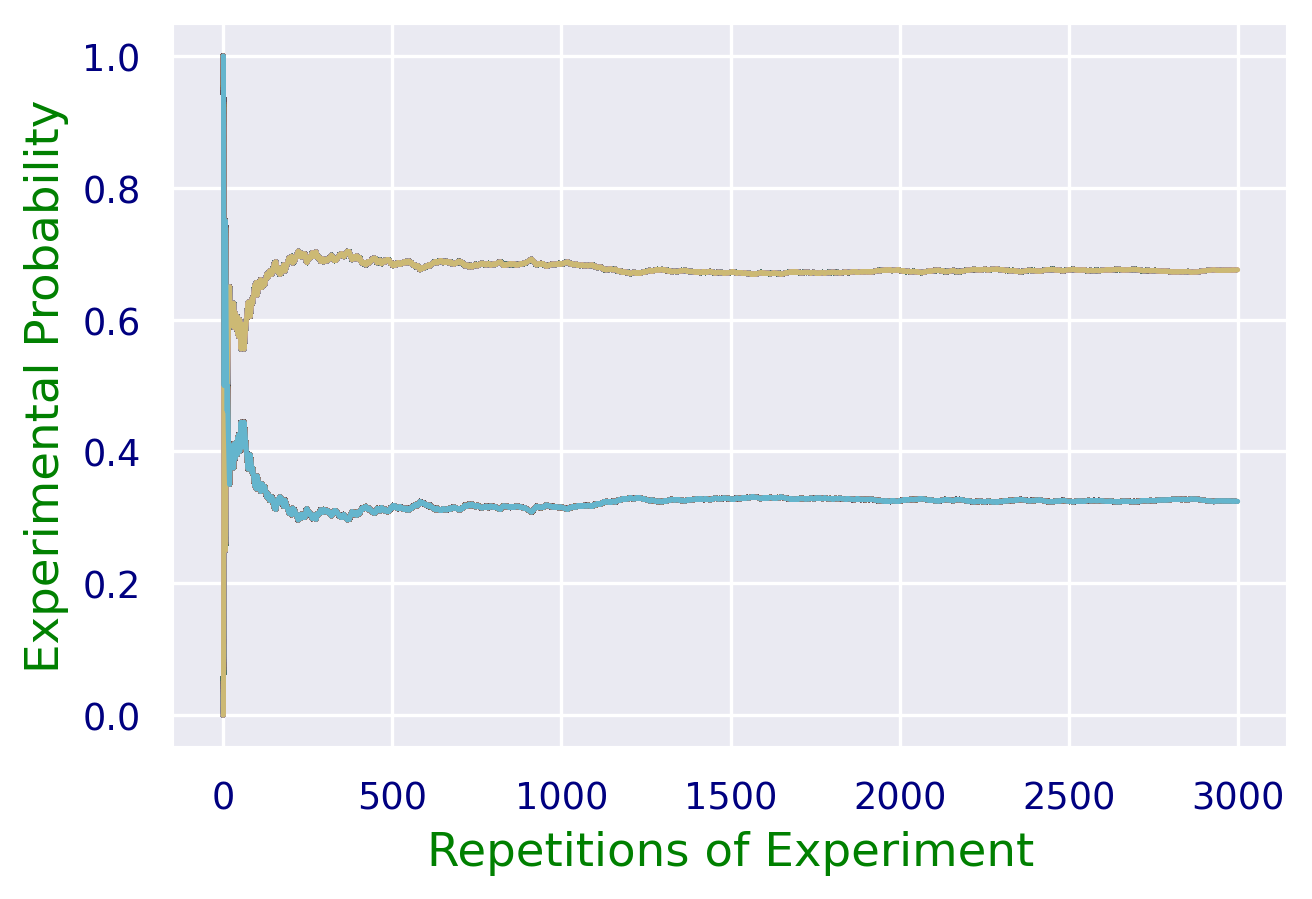

In [10]:
doors = ["goat","goat","car"]

# approximated results
switch_win_probability = []
stick_win_probability = []

#plt.axhline(y=0.66, color='red', linestyle='--')
#plt.axhline(y=0.33, color='green', linestyle='--')

def monte_carlo(n):

  switch_wins = 0
  stick_wins = 0

  for i in range(n):
     random.shuffle(doors)

     k = random.randrange(3)

     if doors[k] != 'car':
       switch_wins +=1
    
     else:
       stick_wins +=1
    
     switch_win_probability.append(switch_wins/(i+1))
     stick_win_probability.append(stick_wins/(i+1))
    
     plt.plot(switch_win_probability)
     plt.plot(stick_win_probability)
     plt.tick_params(axis='x', colors='navy')
     plt.tick_params(axis='y', colors='navy')
     plt.xlabel('Repetitions of Experiment',fontsize=14,color='green')
     plt.ylabel('Experimental Probability',fontsize=14,color='green')

  print('Winning probability if you always switch:', switch_win_probability[-1])
  print('Winning probability if you always stick to your original choice:', stick_win_probability[-1])

monte_carlo(3000)

### Estimating $\pi$ by using intuitive geometry and Monte Carlo simulations

Critical Thinking: we image having a circle inscribed in a square. This means that the radius of the circle is half of the side of the square. The area of the circle is $\pi\cdot (\frac{x}{2})^2 =\frac{\pi\cdot x^2}{4} $ and we also know that the area of the square is $x^2$. So, the ratio between the area of the circle and the area of this square is $\frac{\pi}{4}.$ 

Critical Thinking: we are going to "throw darts" at the square and we are going to count the hits inside the circle versus the overall number of hits inside the square.

3.138933333333333


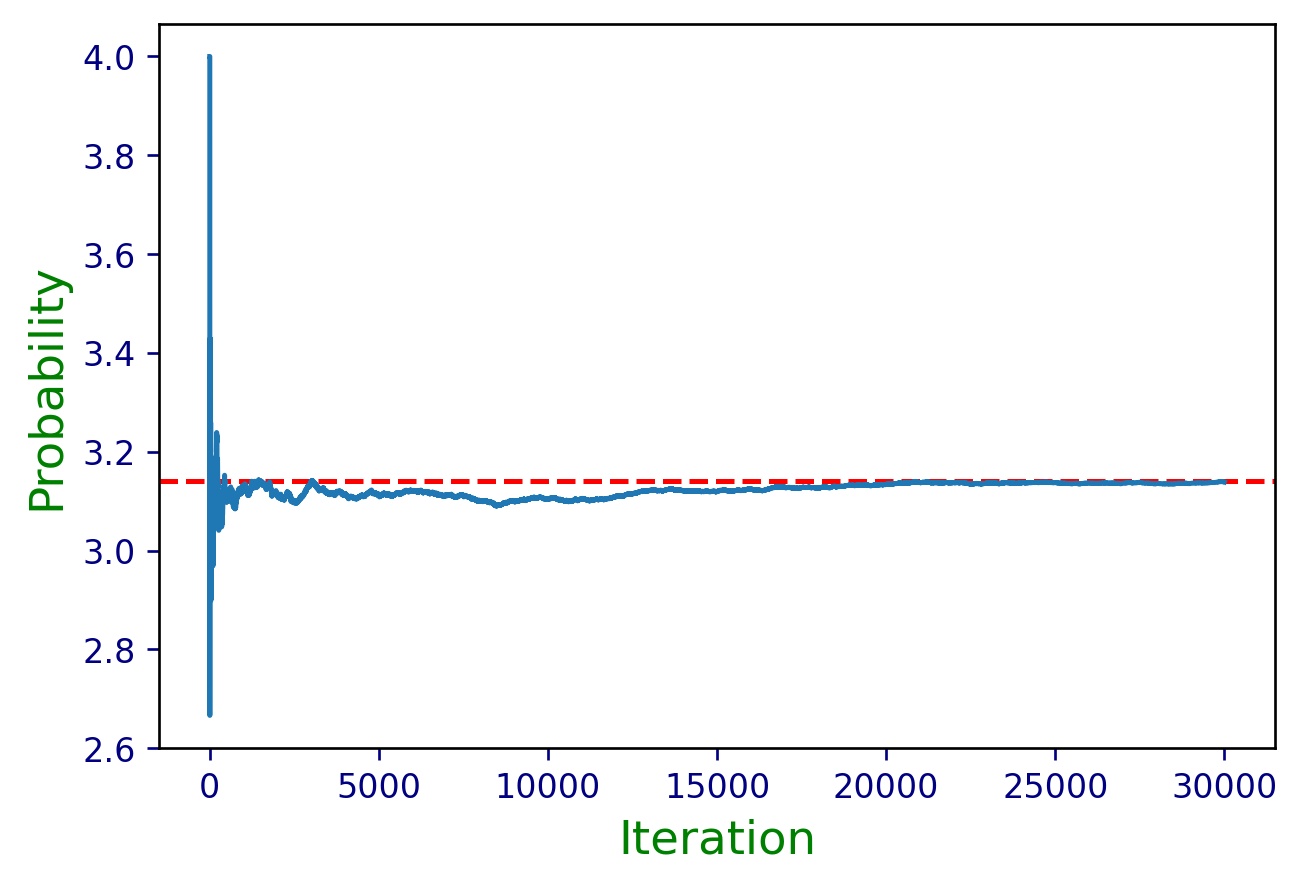

In [ ]:
pi_values = []

def monte_carlo(n):
  in_circle = 0
  out_circle = 0
  for j in range(n):
    x = random.randrange(250,500)
    y = random.randrange(120,370)

    # check if the number lies outside the circle
    if (x-375)**2+(y-245)**2>125**2:
      out_circle = out_circle + 1
    else:
      in_circle = in_circle + 1

    approx_pi = 4.0 * in_circle / (in_circle + out_circle)
    pi_values.append(approx_pi)
    
  return pi_values

pi_values = monte_carlo(30000)
plt.axhline(y=3.1415,color='red',linestyle='--')
plt.plot(pi_values)
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
plt.xlabel('Iteration',fontsize=14,color='green')
plt.ylabel('Probability',fontsize=14,color='green')

answer = pi_values[-1]
print(answer)

## Fun problem to think about:

You're about to get on a plane to Seattle. You want to know  if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it's raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?


In [48]:
def monte(n):
    outcomes = ['lie', 'truth']
    raining = ['raining', 'not raining']
    score = 0
    for i in range (n):
        x = 0
        rain = random.choice(raining)
        person_1 = random.choice(outcomes)
        person_2 = random.choice(outcomes)        
        person_3 = random.choice(outcomes)  
        if person_1 == 'lie' and rain == 'not raining':
            x += 1
        elif person_1 == 'truth' and rain == 'raining':
            x += 1
        if person_2 == 'lie' and rain == 'not raining':
            x += 1
        elif person_2 == 'truth' and rain == 'raining':
            x += 1
        if person_3 == 'lie' and rain == 'not raining':
            x += 1
        elif person_3 == 'truth' and rain == 'raining':
            x += 1
        if x == 3:
            score += 1
    return(score/n)

In [50]:
monte(50000)

0.12426

In [39]:
poss = ['rain']
rain = random.choice(poss)
outs = ['lie']
pick = random.choice(outs)
print(rain, pick)
if rain == 'rain' and pick == 'lie':
    print('yes')

rain lie
yes
